In [1]:
#importing the opencv package 
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Affichage de l'image**

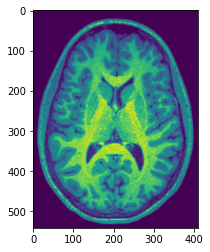

In [3]:
#affichage 
img = cv2.imread("IM_brain_top.jpg",cv2.IMREAD_GRAYSCALE) # blue BRG
image = img
plt.imshow(img)

In [4]:
typ_img = type(img) 
print("image type "+str(typ_img))
shape_image = img.shape 
print("image shape "+str(shape_image))
print(str(img[100,100]))  

image type <class 'numpy.ndarray'>
image shape (542, 411)
33


In [5]:
# Analyse des données en pixels 
print("min = ",np.min(img))
print("max = ",np.max(img))
print("mean = ",np.mean(img))
print("values = ",np.unique(img))

min =  0
max =  252
mean =  84.58209209829324
values =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [6]:
#propriétés d'image
print( img.size )  # 222762  # pour une image en niveau de gris
print( img.dtype ) # uint8 

222762
uint8


**nombre totale de pixels est de : 222762 et le dtype est uint8 indiquant que c'est un unsigned integer codé sur 8 bits (entier signé) c'est pour ça la valeur maximale des pixels ne dépasse pas 2^8 soit 256, les valeurs en pixels représente l'intensité du gris qui est entre 0 et 255**

In [7]:
cellsize = 0.04
img_shape_x = img.shape[0] * cellsize
print("image new size en x :"+str(img_shape_x)+"cm")
img_shape_y = img.shape[1] * cellsize
print("image new size en y :"+str(img_shape_y)+"cm")

image new size en x :21.68cm
image new size en y :16.44cm


In [9]:
image_seuil =img

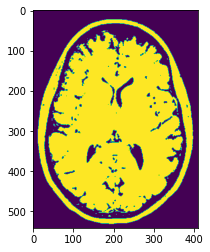

In [8]:
#on va effectuer un seuillage 
seuillage = img 
#manuellement en uilisant une boucle
for i in range(seuillage.shape[0]):
  for j in range(seuillage.shape[1]):
    if(seuillage[i][j] > 70):
      seuillage[i][j] = 1
    else:
      seuillage[i][j] = 0
#affichage 
plt.imshow(seuillage)

**On constate que l'image résultat après l'opération de sueillage binaire (avec un seuil binaire égale 70) nous donne une bonne délimitation de la crane mais on n'a pas beaucoup de détails sur le cerveau**

In [10]:
ret,thresh1 = cv2.threshold(image_seuil,0,70,cv2.THRESH_BINARY)

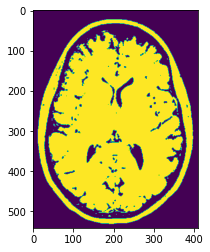

In [11]:
plt.imshow(thresh1)

#Calcul de la Surface Cerveau

In [19]:
sum = 0
for i in range(image_seuil.shape[0]):
  for j in range(image_seuil.shape[1]):
    if(image_seuil[i][j] == 1):
      sum = sum + 1 

surface_cell = cellsize * cellsize
surface = sum * surface_cell

print("La Surface de cerveau est de = " + str(surface) + " cm")

La Surface de cerveau est de = 199.21280000000002 cm


#Application de l'Erosion/Dilatation sur l'image

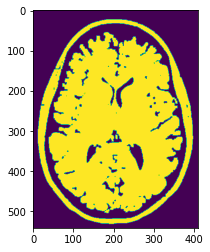

In [21]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(image_seuil,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
erosion = cv2.erode(image_seuil,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
plt.imshow(dilation)

**Les détails de cerveau commence à apparaitre dans l'image avec un noyau de (5,5)**

#Calcul de composantes connexes dans l'image

In [24]:
#calcul de composantes connexe dans 
composante, marker = cv2.connectedComponents(dilation) 
print("Il y a "+str(composante)+" composante connexe ")

Il y a 4 composante connexe 


#Séparation du cerveau et de la crane

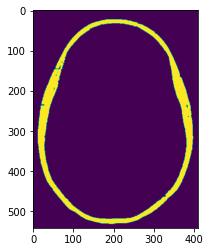

In [25]:
for i in range(marker.shape[0]):
  for j in range(marker.shape[1]):
    if(marker[i][j] == 1):
      marker[i][j] = 1
    else:
      marker[i][j] = 0
plt.imshow(marker)

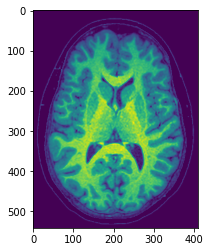

In [26]:
img_2 = cv2.imread("IM_brain_top.jpg",cv2.IMREAD_GRAYSCALE)

for i in range(marker.shape[0]):
  for j in range(marker.shape[1]):
    if(marker[i][j] == 1):
      img_2[i][j] = 0
plt.imshow(img_2)

**On observe bien les détails du cerveau ainsi que la crane dans ce cas**